In [1]:
from Datos import Datos
from Clasificador import  ClasificadorVecinosProximos,ClasificadorRegresionLogistica,Clasificador
from EstrategiaParticionado import EstrategiaParticionado,ValidacionCruzada,ValidacionSimple,ValidacionBootstrap
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.special import expit
from plotModel import plotModel
import matplotlib.pyplot as plt
from IPython.display import HTML, display
%matplotlib inline

# Apartado 1

In [5]:
import numpy as np
from Datos import Datos
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit


dataset = Datos('german.data')
validacionSimple = ShuffleSplit(len(dataset.datos), test_size=.25, random_state=0)
validacionCruzada=2
#Validacion Simple Laplace
file = open("Scikit-Learn","w")


atributos =preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
X = atributos.fit_transform(dataset.datos[:,:-1])
Y=dataset.datos[:,-1]

clf = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
clf.fit(X, Y)

cvs = cross_val_score(clf, X,Y,cv=validacionSimple)
print ("La media de error de Naive Bayes  usando Validacion Simple con Laplace es :" + str((1-np.mean((cvs))) )+ " con Desviacion Tipica = " +  str((np.std((cvs)))) + "\n")





atributos =preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
X = atributos.fit_transform(dataset.datos[:,:-1])
Y=dataset.datos[:,-1]

clf = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
clf.fit(X, Y)

cvs = cross_val_score(clf, X,Y,cv=validacionCruzada)
print ("La media de error de Naive Bayes  usando Validacion Cruzada con Laplace es :" +str((1-np.mean((cvs))))+" con Desviacion Tipica = " +  str((np.std((cvs)))) + "\n")



#Validacion Simple Laplace


atributos =preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
X = atributos.fit_transform(dataset.datos[:,:-1])
Y=dataset.datos[:,-1]

clf = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
clf.fit(X, Y)

cvs = cross_val_score(clf, X,Y,cv=validacionSimple)
print("La media de error de Naive Bayes es  usando Validacion Simple sin Laplace es :" +str((1-np.mean((cvs))))+" con Desviacion Tipica = " +  str((np.std((cvs)))) + "\n")



file.write("Validacion Cruzada sin Laplace")

atributos =preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1],sparse=False)
X = atributos.fit_transform(dataset.datos[:,:-1])
Y=dataset.datos[:,-1]

clf = MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
clf.fit(X, Y)

cvs = cross_val_score(clf, X,Y,cv=validacionCruzada)
print ("La media de error de Naive Bayes  usando Validacion Cruzada con Laplace es :"+ str((1-np.mean((cvs)))) +" con Desviacion Tipica = " +  str((np.std((cvs)))) + "\n")

file.close()


La media de error de Naive Bayes  usando Validacion Simple con Laplace es :0.3649080000000001 con Desviacion Tipica = 0.02825695553310726

La media de error de Naive Bayes  usando Validacion Cruzada con Laplace es :0.361 con Desviacion Tipica = 0.025000000000000022

La media de error de Naive Bayes es  usando Validacion Simple sin Laplace es :0.3649080000000001 con Desviacion Tipica = 0.02825695553310726

La media de error de Naive Bayes  usando Validacion Cruzada con Laplace es :0.361 con Desviacion Tipica = 0.025000000000000022



## Vecinos próximos

Vamos a ejecutar primero las pruebas de Scikit, anotando los resultados para K = 1,3,5,11,21,51 

In [2]:
print ("VECINOS PROXIMOS SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example1.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example1.data")    
X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]
for i in [1,3,5,11,21,51]:
    print ("K = ",  i)
    resultado = KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(resultado, X,Y, cv=10)
    print ("Media erronea del fichero: example1.data :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
    print ("---------------------------------")

VECINOS PROXIMOS SCIKIT
---------------------------------
Procesando fichero: example1.data
---------------------------------
K =  1
Media erronea del fichero: example1.data : 0.17000000000000015 con Desviacion Tipica (std) =  0.06204836822995429
---------------------------------
K =  3
Media erronea del fichero: example1.data : 0.14249999999999985 con Desviacion Tipica (std) =  0.06427480066091222
---------------------------------
K =  5
Media erronea del fichero: example1.data : 0.135 con Desviacion Tipica (std) =  0.05830951894845303
---------------------------------
K =  11
Media erronea del fichero: example1.data : 0.13749999999999996 con Desviacion Tipica (std) =  0.05031152949374529
---------------------------------
K =  21
Media erronea del fichero: example1.data : 0.14250000000000007 con Desviacion Tipica (std) =  0.07335700375560605
---------------------------------
K =  51
Media erronea del fichero: example1.data : 0.125 con Desviacion Tipica (std) =  0.048733971724044825
--

In [3]:
print ("VECINOS PROXIMOS SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example2.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example2.data")    
X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]
for i in [1,3,5,11,21,51]:
    print ("K = ",  i)
    resultado = KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(resultado, X,Y, cv=10)
    print ("Media erronea del fichero: example2.data :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
    print ("---------------------------------")

VECINOS PROXIMOS SCIKIT
---------------------------------
Procesando fichero: example2.data
---------------------------------
K =  1
Media erronea del fichero: example2.data : 0.0 con Desviacion Tipica (std) =  0.0
---------------------------------
K =  3
Media erronea del fichero: example2.data : 0.0 con Desviacion Tipica (std) =  0.0
---------------------------------
K =  5
Media erronea del fichero: example2.data : 0.0 con Desviacion Tipica (std) =  0.0
---------------------------------
K =  11
Media erronea del fichero: example2.data : 0.0 con Desviacion Tipica (std) =  0.0
---------------------------------
K =  21
Media erronea del fichero: example2.data : 0.0 con Desviacion Tipica (std) =  0.0
---------------------------------
K =  51
Media erronea del fichero: example2.data : 0.0 con Desviacion Tipica (std) =  0.0
---------------------------------


In [4]:
print ("VECINOS PROXIMOS SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example3.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example3.data")    
X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]
for i in [1,3,5,11,21,51]:
    print ("K = ",  i)
    resultado = KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(resultado, X,Y, cv=10)
    print ("Media erronea del fichero: example3.data :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
    print ("---------------------------------")

VECINOS PROXIMOS SCIKIT
---------------------------------
Procesando fichero: example3.data
---------------------------------
K =  1
Media erronea del fichero: example3.data : 0.02750000000000019 con Desviacion Tipica (std) =  0.020766559657295205
---------------------------------
K =  3
Media erronea del fichero: example3.data : 0.03749999999999987 con Desviacion Tipica (std) =  0.025617376914898987
---------------------------------
K =  5
Media erronea del fichero: example3.data : 0.03249999999999997 con Desviacion Tipica (std) =  0.02749999999999999
---------------------------------
K =  11
Media erronea del fichero: example3.data : 0.022499999999999964 con Desviacion Tipica (std) =  0.026100766272276376
---------------------------------
K =  21
Media erronea del fichero: example3.data : 0.030000000000000027 con Desviacion Tipica (std) =  0.029154759474226494
---------------------------------
K =  51
Media erronea del fichero: example3.data : 0.029999999999999916 con Desviacion Tipi

In [5]:
print ("VECINOS PROXIMOS SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example4.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example4.data")    
X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]
for i in [1,3,5,11,21,51]:
    print ("K = ",  i)
    resultado = KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(resultado, X,Y, cv=10)
    print ("Media erronea del fichero: example4.data :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
    print ("---------------------------------")

VECINOS PROXIMOS SCIKIT
---------------------------------
Procesando fichero: example4.data
---------------------------------
K =  1
Media erronea del fichero: example4.data : 0.030000000000000027 con Desviacion Tipica (std) =  0.045825756949558386
---------------------------------
K =  3
Media erronea del fichero: example4.data : 0.09000000000000008 con Desviacion Tipica (std) =  0.09433981132056604
---------------------------------
K =  5
Media erronea del fichero: example4.data : 0.10999999999999999 con Desviacion Tipica (std) =  0.1044030650891055
---------------------------------
K =  11
Media erronea del fichero: example4.data : 0.19999999999999996 con Desviacion Tipica (std) =  0.07745966692414837
---------------------------------
K =  21
Media erronea del fichero: example4.data : 0.3400000000000001 con Desviacion Tipica (std) =  0.12000000000000001
---------------------------------
K =  51
Media erronea del fichero: example4.data : 0.5200000000000001 con Desviacion Tipica (std)

Vamos a ejecutar todos los conjuntos de datos, primero sin normalizar y luego normalizando los datos

### Example 1

In [6]:
d = Datos('ConjuntosDatos/example1.data')
e = ValidacionCruzada()

k = 1

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example1.data")
print ("---------------------------------")
print ("Media del fichero: example1.data")
print (np.mean(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example1.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")
print ("\nGenerando grafica del fichero: example1.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")


Procesando fichero: example1.data
---------------------------------
Media del fichero: example1.data
0.4974999999999999
---------------------------------
Desviacion tipica del fichero: example1.data
0.07701460900374682
---------------------------------
Media del fichero: example1.data con datos normalizados
0.53
---------------------------------
Desviacion tipica del fichero: example1.data con datos normalizados
0.03674234614174767
---------------------------------

Generando grafica del fichero: example1.data
Grafica generada con exito
---------------------------------


In [7]:
d = Datos('ConjuntosDatos/example1.data')
e = ValidacionCruzada()
k = 3

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example1.data")
print ("---------------------------------")
print ("Media del fichero: example1.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example1.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example1.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example1.data
---------------------------------
Media del fichero: example1.data
0.48
---------------------------------
Desviacion tipica del fichero: example1.data
0.09137833441248533
---------------------------------
Media del fichero: example1.data con datos normalizados
0.5225000000000001
---------------------------------
Desviacion tipica del fichero: example1.data con datos normalizados
0.07284401142166731
---------------------------------

Generando grafica del fichero: example1.data
Grafica generada con exito
---------------------------------


In [8]:
d = Datos('ConjuntosDatos/example1.data')
e = ValidacionCruzada()
k = 5

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example1.data")
print ("---------------------------------")
print ("Media del fichero: example1.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example1.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example1.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example1.data
---------------------------------
Media del fichero: example1.data
0.48249999999999993
---------------------------------
Desviacion tipica del fichero: example1.data
0.05249999999999999
---------------------------------
Media del fichero: example1.data con datos normalizados
0.4825000000000001
---------------------------------
Desviacion tipica del fichero: example1.data con datos normalizados
0.05706356105256662
---------------------------------

Generando grafica del fichero: example1.data
Grafica generada con exito
---------------------------------


In [9]:
d = Datos('ConjuntosDatos/example1.data')
e = ValidacionCruzada()
k = 11

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example1.data")
print ("---------------------------------")
print ("Media del fichero: example1.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example1.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example1.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example1.data
---------------------------------
Media del fichero: example1.data
0.45500000000000007
---------------------------------
Desviacion tipica del fichero: example1.data
0.0788986691902975
---------------------------------
Media del fichero: example1.data con datos normalizados
0.4600000000000001
---------------------------------
Desviacion tipica del fichero: example1.data con datos normalizados
0.06144102863722253
---------------------------------

Generando grafica del fichero: example1.data
Grafica generada con exito
---------------------------------


In [10]:
d = Datos('ConjuntosDatos/example1.data')
e = ValidacionCruzada()
k = 21

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example1.data")
print ("---------------------------------")
print ("Media del fichero: example1.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example1.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example1.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example1.data
---------------------------------
Media del fichero: example1.data
0.49499999999999994
---------------------------------
Desviacion tipica del fichero: example1.data
0.04847679857416328
---------------------------------
Media del fichero: example1.data con datos normalizados
0.48999999999999994
---------------------------------
Desviacion tipica del fichero: example1.data con datos normalizados
0.04636809247747851
---------------------------------

Generando grafica del fichero: example1.data
Grafica generada con exito
---------------------------------


In [11]:
d = Datos('ConjuntosDatos/example1.data')
e = ValidacionCruzada()
k = 51

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example1.data")
print ("---------------------------------")
print ("Media del fichero: example1.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example1.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example1.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example1.data
---------------------------------
Media del fichero: example1.data
0.5375
---------------------------------
Desviacion tipica del fichero: example1.data
0.06637959023675875
---------------------------------
Media del fichero: example1.data con datos normalizados
0.5225000000000002
---------------------------------
Desviacion tipica del fichero: example1.data con datos normalizados
0.05640257086339239
---------------------------------

Generando grafica del fichero: example1.data
Grafica generada con exito
---------------------------------


### Example 2

In [12]:
d = Datos('ConjuntosDatos/example2.data')
e = ValidacionCruzada()
K = 1

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example2.data")
print ("---------------------------------")
print ("Media del fichero: example2.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example2.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example2.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example2.data
---------------------------------
Media del fichero: example2.data
0.46499999999999997
---------------------------------
Desviacion tipica del fichero: example2.data
0.051478150704935
---------------------------------
Media del fichero: example2.data con datos normalizados
0.46499999999999997
---------------------------------
Desviacion tipica del fichero: example2.data con datos normalizados
0.051478150704935
---------------------------------

Generando grafica del fichero: example2.data
Grafica generada con exito
---------------------------------


In [13]:
d = Datos('ConjuntosDatos/example2.data')
e = ValidacionCruzada()
K = 3

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example2.data")
print ("---------------------------------")
print ("Media del fichero: example2.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example2.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example2.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example2.data
---------------------------------
Media del fichero: example2.data
0.4899999999999999
---------------------------------
Desviacion tipica del fichero: example2.data
0.07516648189186455
---------------------------------
Media del fichero: example2.data con datos normalizados
0.4899999999999999
---------------------------------
Desviacion tipica del fichero: example2.data con datos normalizados
0.07516648189186455
---------------------------------

Generando grafica del fichero: example2.data
Grafica generada con exito
---------------------------------


In [14]:
d = Datos('ConjuntosDatos/example2.data')
e = ValidacionCruzada()
K = 5

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example2.data")
print ("---------------------------------")
print ("Media del fichero: example2.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example2.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example2.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example2.data
---------------------------------
Media del fichero: example2.data
0.52
---------------------------------
Desviacion tipica del fichero: example2.data
0.1041633332799983
---------------------------------
Media del fichero: example2.data con datos normalizados
0.52
---------------------------------
Desviacion tipica del fichero: example2.data con datos normalizados
0.1041633332799983
---------------------------------

Generando grafica del fichero: example2.data
Grafica generada con exito
---------------------------------


In [15]:
d = Datos('ConjuntosDatos/example2.data')
e = ValidacionCruzada()
K = 11

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example2.data")
print ("---------------------------------")
print ("Media del fichero: example2.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example2.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example2.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example2.data
---------------------------------
Media del fichero: example2.data
0.48
---------------------------------
Desviacion tipica del fichero: example2.data
0.0714142842854285
---------------------------------
Media del fichero: example2.data con datos normalizados
0.48
---------------------------------
Desviacion tipica del fichero: example2.data con datos normalizados
0.0714142842854285
---------------------------------

Generando grafica del fichero: example2.data
Grafica generada con exito
---------------------------------


In [16]:
d = Datos('ConjuntosDatos/example2.data')
e = ValidacionCruzada()
K = 21

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example2.data")
print ("---------------------------------")
print ("Media del fichero: example2.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example2.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example2.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example2.data
---------------------------------
Media del fichero: example2.data
0.49499999999999994
---------------------------------
Desviacion tipica del fichero: example2.data
0.06873863542433761
---------------------------------
Media del fichero: example2.data con datos normalizados
0.49499999999999994
---------------------------------
Desviacion tipica del fichero: example2.data con datos normalizados
0.06873863542433761
---------------------------------

Generando grafica del fichero: example2.data
Grafica generada con exito
---------------------------------


In [17]:
d = Datos('ConjuntosDatos/example2.data')
e = ValidacionCruzada()
K = 51

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example2.data")
print ("---------------------------------")
print ("Media del fichero: example2.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example2.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example2.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example2.data
---------------------------------
Media del fichero: example2.data
0.48500000000000015
---------------------------------
Desviacion tipica del fichero: example2.data
0.06999999999999999
---------------------------------
Media del fichero: example2.data con datos normalizados
0.48500000000000015
---------------------------------
Desviacion tipica del fichero: example2.data con datos normalizados
0.06999999999999999
---------------------------------

Generando grafica del fichero: example2.data
Grafica generada con exito
---------------------------------


### Example 3

In [18]:
d = Datos('ConjuntosDatos/example3.data')
e = ValidacionCruzada()
K = 1

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example3.data")
print ("---------------------------------")
print ("Media del fichero: example3.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example3.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example3.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example3.data
---------------------------------
Media del fichero: example3.data
0.45750000000000013
---------------------------------
Desviacion tipica del fichero: example3.data
0.04616546328154847
---------------------------------
Media del fichero: example3.data con datos normalizados
0.45750000000000013
---------------------------------
Desviacion tipica del fichero: example3.data con datos normalizados
0.04616546328154847
---------------------------------

Generando grafica del fichero: example3.data
Grafica generada con exito
---------------------------------


In [19]:
d = Datos('ConjuntosDatos/example3.data')
e = ValidacionCruzada()
K = 3

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example3.data")
print ("---------------------------------")
print ("Media del fichero: example3.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example3.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example3.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example3.data
---------------------------------
Media del fichero: example3.data
0.46749999999999997
---------------------------------
Desviacion tipica del fichero: example3.data
0.0922293337284836
---------------------------------
Media del fichero: example3.data con datos normalizados
0.465
---------------------------------
Desviacion tipica del fichero: example3.data con datos normalizados
0.0874642784226795
---------------------------------

Generando grafica del fichero: example3.data
Grafica generada con exito
---------------------------------


In [20]:
d = Datos('ConjuntosDatos/example3.data')
e = ValidacionCruzada()
K = 5

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example3.data")
print ("---------------------------------")
print ("Media del fichero: example3.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example3.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example3.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example3.data
---------------------------------
Media del fichero: example3.data
0.46499999999999997
---------------------------------
Desviacion tipica del fichero: example3.data
0.06244997998398398
---------------------------------
Media del fichero: example3.data con datos normalizados
0.46499999999999997
---------------------------------
Desviacion tipica del fichero: example3.data con datos normalizados
0.06244997998398398
---------------------------------

Generando grafica del fichero: example3.data
Grafica generada con exito
---------------------------------


In [21]:
d = Datos('ConjuntosDatos/example3.data')
e = ValidacionCruzada()
K = 11

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example3.data")
print ("---------------------------------")
print ("Media del fichero: example3.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example3.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example3.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example3.data
---------------------------------
Media del fichero: example3.data
0.5175
---------------------------------
Desviacion tipica del fichero: example3.data
0.0851836251870041
---------------------------------
Media del fichero: example3.data con datos normalizados
0.5175
---------------------------------
Desviacion tipica del fichero: example3.data con datos normalizados
0.08735702604828074
---------------------------------

Generando grafica del fichero: example3.data
Grafica generada con exito
---------------------------------


In [22]:
d = Datos('ConjuntosDatos/example3.data')
e = ValidacionCruzada()
K = 21

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example3.data")
print ("---------------------------------")
print ("Media del fichero: example3.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example3.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example3.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example3.data
---------------------------------
Media del fichero: example3.data
0.5575000000000001
---------------------------------
Desviacion tipica del fichero: example3.data
0.08591420138719792
---------------------------------
Media del fichero: example3.data con datos normalizados
0.5600000000000002
---------------------------------
Desviacion tipica del fichero: example3.data con datos normalizados
0.08154753215150044
---------------------------------

Generando grafica del fichero: example3.data
Grafica generada con exito
---------------------------------


In [23]:
d = Datos('ConjuntosDatos/example3.data')
e = ValidacionCruzada()
K = 51

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example3.data")
print ("---------------------------------")
print ("Media del fichero: example3.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example3.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

print ("\nGenerando grafica del fichero: example3.data")
ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example3.data
---------------------------------
Media del fichero: example3.data
0.5175
---------------------------------
Desviacion tipica del fichero: example3.data
0.06523994175349945
---------------------------------
Media del fichero: example3.data con datos normalizados
0.5175
---------------------------------
Desviacion tipica del fichero: example3.data con datos normalizados
0.06523994175349945
---------------------------------

Generando grafica del fichero: example3.data
Grafica generada con exito
---------------------------------


### Example 4

In [24]:
d = Datos('ConjuntosDatos/example4.data')
e = ValidacionCruzada()
K = 1

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example4.data")
print ("---------------------------------")
print ("Media del fichero: example4.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example4.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")
print ("\nGenerando grafica del fichero: example4.data")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example4.data
---------------------------------
Media del fichero: example4.data
0.53
---------------------------------
Desviacion tipica del fichero: example4.data
0.1268857754044952
---------------------------------
Media del fichero: example4.data con datos normalizados
0.4600000000000001
---------------------------------
Desviacion tipica del fichero: example4.data con datos normalizados
0.0916515138991168
---------------------------------

Generando grafica del fichero: example4.data
Grafica generada con exito
---------------------------------


In [25]:
d = Datos('ConjuntosDatos/example4.data')
e = ValidacionCruzada()
K = 3

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example4.data")
print ("---------------------------------")
print ("Media del fichero: example4.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example4.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example4.data
---------------------------------
Media del fichero: example4.data
0.49000000000000005
---------------------------------
Desviacion tipica del fichero: example4.data
0.16999999999999998
---------------------------------
Media del fichero: example4.data con datos normalizados
0.43
---------------------------------
Desviacion tipica del fichero: example4.data con datos normalizados
0.1268857754044952
---------------------------------
Grafica generada con exito
---------------------------------


In [26]:
d = Datos('ConjuntosDatos/example4.data')
e = ValidacionCruzada()
K = 5

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example4.data")
print ("---------------------------------")
print ("Media del fichero: example4.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example4.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example4.data
---------------------------------
Media del fichero: example4.data
0.5099999999999999
---------------------------------
Desviacion tipica del fichero: example4.data
0.12999999999999998
---------------------------------
Media del fichero: example4.data con datos normalizados
0.43
---------------------------------
Desviacion tipica del fichero: example4.data con datos normalizados
0.14177446878757824
---------------------------------
Grafica generada con exito
---------------------------------


In [27]:
d = Datos('ConjuntosDatos/example4.data')
e = ValidacionCruzada()
K = 11

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example4.data")
print ("---------------------------------")
print ("Media del fichero: example4.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example4.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example4.data
---------------------------------
Media del fichero: example4.data
0.54
---------------------------------
Desviacion tipica del fichero: example4.data
0.12
---------------------------------
Media del fichero: example4.data con datos normalizados
0.36
---------------------------------
Desviacion tipica del fichero: example4.data con datos normalizados
0.12806248474865697
---------------------------------
Grafica generada con exito
---------------------------------


In [28]:
d = Datos('ConjuntosDatos/example4.data')
e = ValidacionCruzada()
K = 21

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example4.data")
print ("---------------------------------")
print ("Media del fichero: example4.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example4.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example4.data
---------------------------------
Media del fichero: example4.data
0.5599999999999999
---------------------------------
Desviacion tipica del fichero: example4.data
0.1113552872566004
---------------------------------
Media del fichero: example4.data con datos normalizados
0.52
---------------------------------
Desviacion tipica del fichero: example4.data con datos normalizados
0.09797958971132711
---------------------------------
Grafica generada con exito
---------------------------------


In [29]:
d = Datos('ConjuntosDatos/example4.data')
e = ValidacionCruzada()
K = 51

c = ClasificadorVecinosProximos(k)
errores = c.validacion(particionado=e,dataset=d,clasificador=c)

d.calcularMediasDesv(d.extraeDatos(e.particiones[0].indicesTrain))
d.normalizarDatos()

c = ClasificadorVecinosProximos(k)
errores_norm = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Procesando fichero: example4.data")
print ("---------------------------------")
print ("Media del fichero: example4.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data")
print (np.std(errores))
print ("---------------------------------")
print ("Media del fichero: example4.data con datos normalizados")
print (np.mean(errores_norm))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data con datos normalizados")
print (np.std(errores_norm))
print ("---------------------------------")

ii = e.particiones[-1].indicesTrain
# plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

Procesando fichero: example4.data
---------------------------------
Media del fichero: example4.data
0.5499999999999999
---------------------------------
Desviacion tipica del fichero: example4.data
0.12845232578665128
---------------------------------
Media del fichero: example4.data con datos normalizados
0.43
---------------------------------
Desviacion tipica del fichero: example4.data con datos normalizados
0.10999999999999999
---------------------------------
Grafica generada con exito
---------------------------------


#### Comentarios Knn

En primer lugar, comentar que hemos dejado todas las funciones plotModel comentadas porque tardan tanto que en nuestros ordenadores no hemos podido ejecutarlas. 

Por otro lado, las medias de errores nos dan muy superiores a sklearn. Se puede observar que en nuestra implementación hay diferencia entre normalizar los datos y no normalizarlos, pero los errores simepre rondan el 50%. 

Creemos que en estamos arrastrando un error de una práctica anterior que hace que estos datos salgan incorrectamente. En este caso tendremos que revisar el código, corregirlo y volver a realizar las pruebas. 

## Regresión Logística

### Example 1

Media del fichero: example1.data
0.4525
---------------------------------
Desviacion tipica del fichero: example1.data
0.052974050251042744
---------------------------------
Grafica generada con exito
---------------------------------


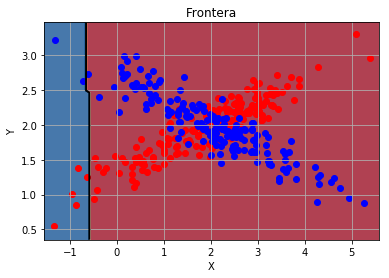

In [30]:
d = Datos('ConjuntosDatos/example1.data')
e = ValidacionCruzada()
e.creaParticiones(d.datos)

c = ClasificadorRegresionLogistica(50)
c.entrenamiento(datostrain=d.extraeDatos(idx=e.particiones[-1].indicesTrain))

errores = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Media del fichero: example1.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example1.data")
print (np.std(errores))
print ("---------------------------------")


ii = e.particiones[-1].indicesTrain
plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

REGRESION LOGISTICA SCIKIT
---------------------------------
Procesando fichero: example1.data
---------------------------------
Media erronea del fichero: example1.data  : 0.5775 con Desviacion Tipica (std) =  0.05963430220938282
---------------------------------


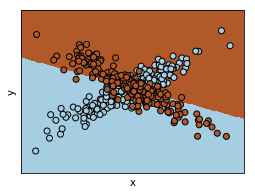

In [31]:
print ("REGRESION LOGISTICA SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example1.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example1.data")

X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]

logreg = LogisticRegression(C=1e5,max_iter=100) # Creando el modelo

logreg.fit(X, Y) #ajustando el modelo

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

cvs =cross_val_score(logreg, X,Y, cv=10,n_jobs=-1)
print ("Media erronea del fichero: example1.data  :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
print ("---------------------------------")

h = .02
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

#### Comentarios Example 1 - RL

A pesar de que nuestro hiper-plano no es igual a sklearn, la media de erroes nos da inferior. Pensamos que tenemos algún error en el código que hace que la frontera no salga igual a sklearn, pero en este caso, debido a la distribución de los datos nos da un resultado que podemos considerar correcto

### Example 2

Media del fichero: example2.data
0.24999999999999992
---------------------------------
Desviacion tipica del fichero: example2.data
0.06800735254367724
---------------------------------
Grafica generada con exito
---------------------------------


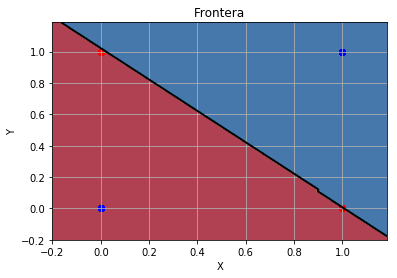

In [38]:
d = Datos('ConjuntosDatos/example2.data')
e = ValidacionCruzada()
e.creaParticiones(d.datos)

c = ClasificadorRegresionLogistica(50)
c.entrenamiento(datostrain=d.extraeDatos(idx=e.particiones[-1].indicesTrain))

errores = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Media del fichero: example2.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example2.data")
print (np.std(errores))
print ("---------------------------------")


ii = e.particiones[-1].indicesTrain
plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

REGRESION LOGISTICA SCIKIT
---------------------------------
Procesando fichero: example2.data
---------------------------------
Media erronea del fichero: example2.data  : 0.55 con Desviacion Tipica (std) =  0.12399596767637244
---------------------------------


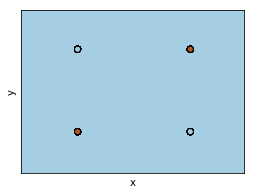

In [39]:
print ("REGRESION LOGISTICA SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example2.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example2.data")

X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]

logreg = LogisticRegression(C=1e5) # Creando el modelo

logreg.fit(X, Y) #ajustando el modelo

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

cvs =cross_val_score(logreg, X,Y, cv=10,n_jobs=-1)
print ("Media erronea del fichero: example2.data  :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
print ("---------------------------------")


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

#### Comentarios example 2 - RL

Este ejemplo nos varía mucho la salida entre ejecuciones, por lo que hay casos que da una media de error similar, y otras veces que da una media menor. No diríamos que los resultados son incorrectos, pero como hemos comentado antes, es posible que un error en el código esté dando estos resultados.

### Example 3

Media del fichero: example3.data
0.5050000000000001
---------------------------------
Desviacion tipica del fichero: example3.data
0.08124038404635961
---------------------------------
Grafica generada con exito
---------------------------------


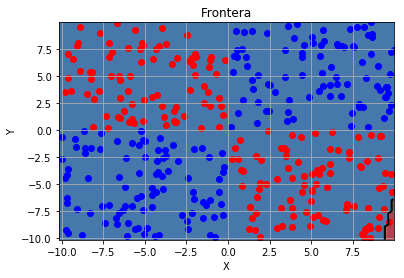

In [42]:
d = Datos('ConjuntosDatos/example3.data')
e = ValidacionCruzada()
e.creaParticiones(d.datos)

c = ClasificadorRegresionLogistica(50)
c.entrenamiento(datostrain=d.extraeDatos(idx=e.particiones[-1].indicesTrain))

errores = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Media del fichero: example3.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example3.data")
print (np.std(errores))
print ("---------------------------------")

ii = e.particiones[-1].indicesTrain
plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

REGRESION LOGISTICA SCIKIT
---------------------------------
Procesando fichero: example3.data
---------------------------------
Media erronea del fichero: example3.data  : 0.535 con Desviacion Tipica (std) =  0.06910137480542626
---------------------------------


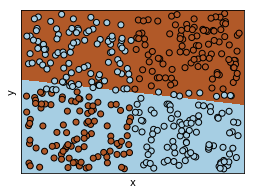

In [35]:
print ("REGRESION LOGISTICA SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example3.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example3.data")

X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]



logreg = LogisticRegression(C=1e5) # Creando el modelo

logreg.fit(X, Y) #ajustando el modelo

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

cvs =cross_val_score(logreg, X,Y, cv=10,n_jobs=-1)
print ("Media erronea del fichero: example3.data  :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
print ("---------------------------------")


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

#### Comentarios example 3 - RL

En este caso las medias de errores siempre son parecidas, al rededor de 50% de acierto. A diferencia de sklearn, nuestro clasificador consigue un 50% porque la frontera no separa correctamente. Como se puede ver en la gráfica, pinta todo del mismo color, por lo que acierta todos los puntos de ese color.

Sin embargo, la gráfica de sklearn muestra que debería separar con un hiper-plano por la mitad, y acertar la mitad de los puntos en cada color.

### Example 4

Media del fichero: example4.data
0.5
---------------------------------
Desviacion tipica del fichero: example4.data
0.15491933384829668
---------------------------------
Grafica generada con exito
---------------------------------


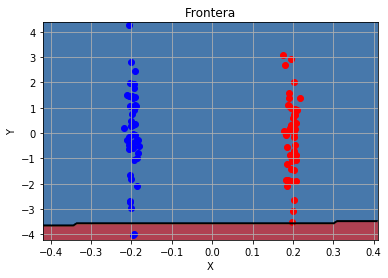

In [43]:
d = Datos('ConjuntosDatos/example4.data')
e = ValidacionCruzada()
e.creaParticiones(d.datos)

c = ClasificadorRegresionLogistica(50)
c.entrenamiento(datostrain=d.extraeDatos(idx=e.particiones[-1].indicesTrain))

errores = c.validacion(particionado=e,dataset=d,clasificador=c)

print ("Media del fichero: example4.data")
print (np.average(errores))
print ("---------------------------------")
print ("Desviacion tipica del fichero: example4.data")
print (np.std(errores))
print ("---------------------------------")


ii = e.particiones[-1].indicesTrain
plotModel(d.datos[ii,0],d.datos[ii,1],d.datos[ii,-1]!=0,c,"Frontera",d.diccionarios)
print ("Grafica generada con exito")
print ("---------------------------------")

REGRESION LOGISTICA SCIKIT
---------------------------------
Procesando fichero: example4.data
---------------------------------
Media erronea del fichero: example4.data  : 0.0 con Desviacion Tipica (std) =  0.0
---------------------------------


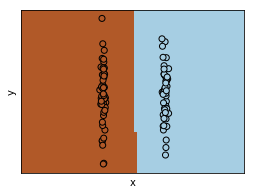

In [44]:
#import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
import Datos

from sklearn.model_selection import cross_val_score
from Datos import Datos


print ("REGRESION LOGISTICA SCIKIT")
print ("---------------------------------")
print ("Procesando fichero: example4.data")
print ("---------------------------------")
dataset = Datos("./ConjuntosDatos/example4.data")

X=dataset.datos[:,:-1]
Y=dataset.datos[:,-1]



logreg = LogisticRegression(C=1e5) # Creando el modelo

logreg.fit(X, Y) #ajustando el modelo

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

cvs =cross_val_score(logreg, X,Y, cv=10,n_jobs=-1)
print ("Media erronea del fichero: example4.data  :",(1-np.mean((cvs))), "con Desviacion Tipica (std) = ", (np.std((cvs))))
print ("---------------------------------")


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

#### Comentarios example 4 - RL

En éste caso sí que podemos decir que nuestro algoritmo no clasifica correctamente. En sklearn el error es de 0, y el hiper-plano divide correctamente los dos conjuntos de datos. 

En nuestro algoritmo observamos que de nuevo "colorea" todo el gráfico con un color, y acierta sólo los puntos de ese color.

Con estos datos deducimos que en nuestro algoritmo hay algún error por encontrar, arreglar y volver a ejecutar las pruebas.